# **Project Drones**

### Inladen van de libraries

In [7]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### Inladen van data

(551, 640, 640, 3)

(28, 640, 640, 3)

(56, 640, 640, 3)

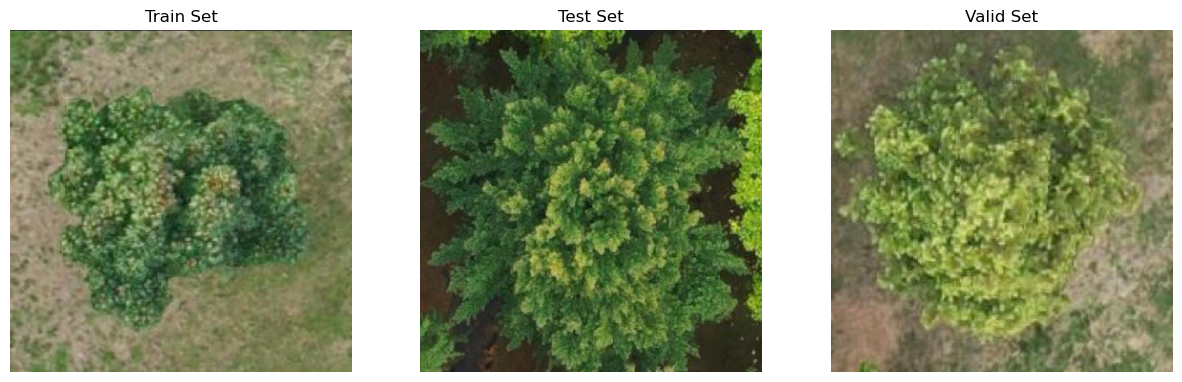

In [8]:
def laad_afbeeldingen(map_pad):
    afbeeldingen = []
    bestandsnamen = os.listdir(map_pad)

    for bestandsnaam in bestandsnamen:
        afbeelding_pad = os.path.join(map_pad, bestandsnaam)
        if os.path.isfile(afbeelding_pad):
            afbeelding = Image.open(afbeelding_pad)
            afbeeldingen.append(np.array(afbeelding))

    return np.array(afbeeldingen)

def toon_willekeurige_afbeeldingen_per_set(train_afbeeldingen, test_afbeeldingen, valid_afbeeldingen):
    train_afbeelding = train_afbeeldingen[np.random.randint(len(train_afbeeldingen))]
    test_afbeelding = test_afbeeldingen[np.random.randint(len(test_afbeeldingen))]
    valid_afbeelding = valid_afbeeldingen[np.random.randint(len(valid_afbeeldingen))]

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(train_afbeelding)
    axs[0].set_title("Train Set")
    axs[0].axis('off')
    axs[1].imshow(test_afbeelding)
    axs[1].set_title("Test Set")
    axs[1].axis('off')
    axs[2].imshow(valid_afbeelding)
    axs[2].set_title("Valid Set")
    axs[2].axis('off')
    plt.show()

train_map_pad = 'train'
train_afbeeldingen = laad_afbeeldingen(train_map_pad)

test_map_pad = 'test'
test_afbeeldingen = laad_afbeeldingen(test_map_pad)

valid_map_pad = 'valid'
valid_afbeeldingen = laad_afbeeldingen(valid_map_pad)

display(train_afbeeldingen.shape, test_afbeeldingen.shape, valid_afbeeldingen.shape)
toon_willekeurige_afbeeldingen_per_set(train_afbeeldingen, test_afbeeldingen, valid_afbeeldingen)

In [16]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [33]:
path = 'dataset/'

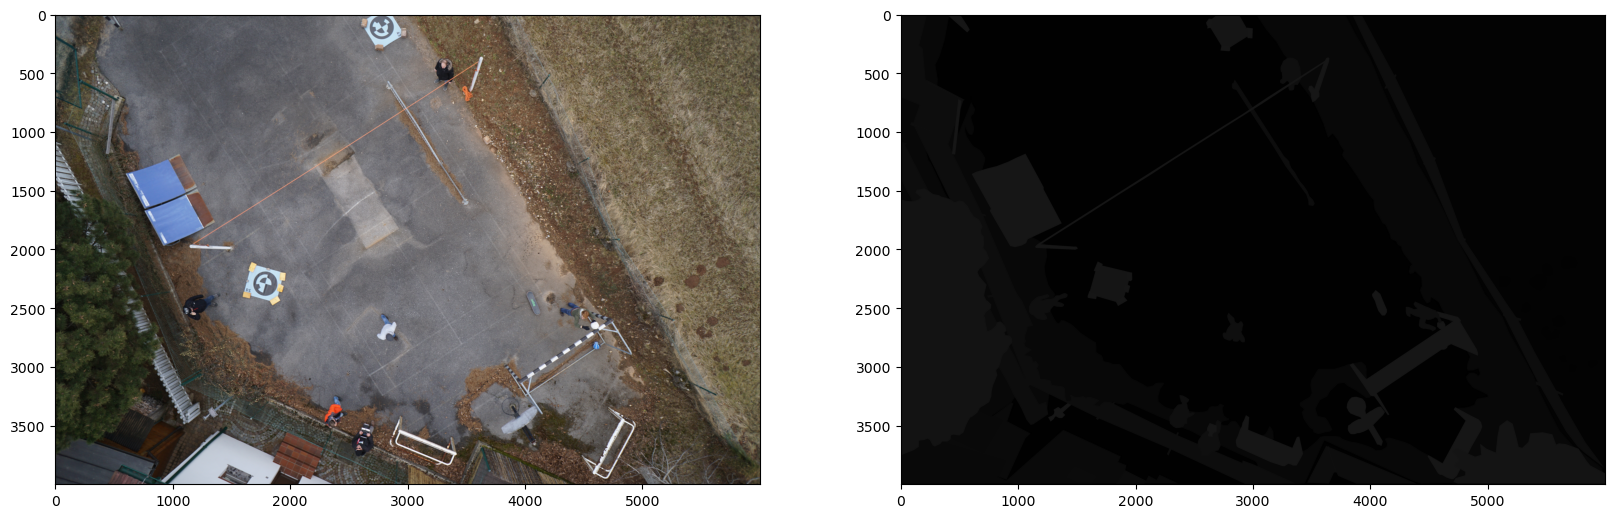

In [28]:
img_path = os.path.join(path, 'original_images/001.jpg')
mask_path = os.path.join(path, 'label_images_semantic/001.png')

if os.path.isfile(img_path) and os.path.isfile(mask_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask_test = cv2.imread(mask_path)
    mask_test = cv2.cvtColor(mask_test, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    axs[0].imshow(img)
    axs[1].imshow(mask_test)
else:
    print("Image file paths are incorrect or the images could not be loaded.")


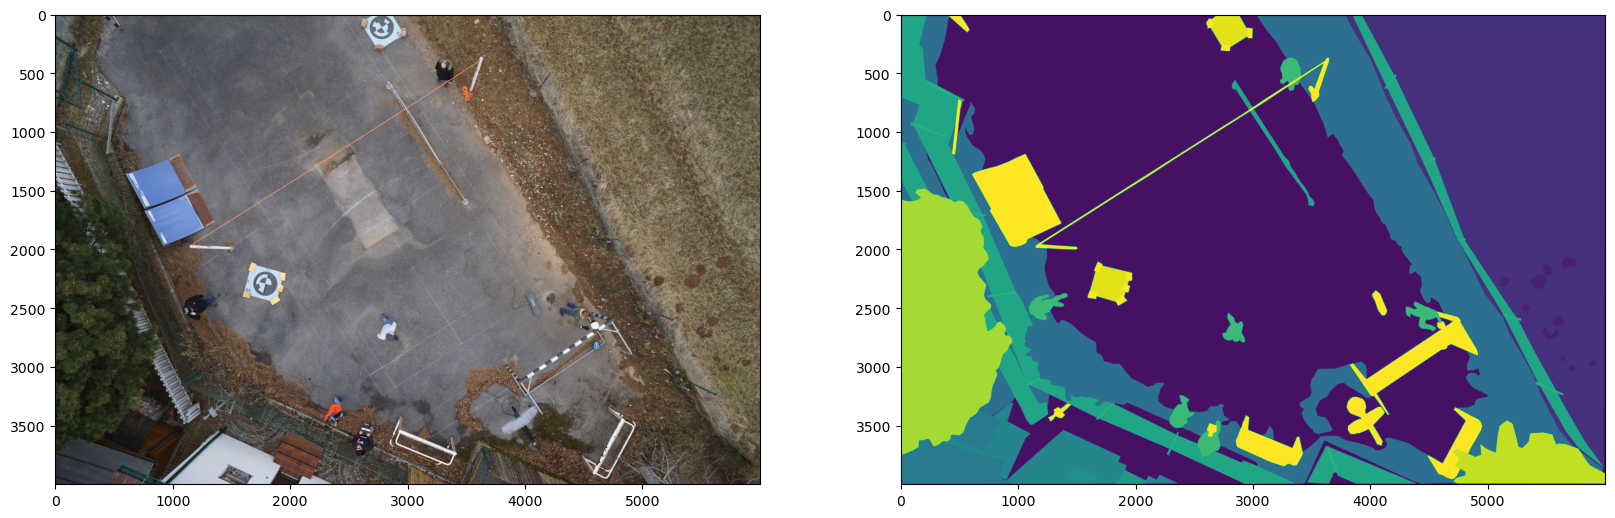

In [30]:
img_path = os.path.join(path, 'original_images/001.jpg')
mask_path = os.path.join(path, 'label_images_semantic/001.png')

if os.path.isfile(img_path) and os.path.isfile(mask_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    axs[0].imshow(img)
    axs[1].imshow(mask)
else:
    print("Image file paths are incorrect or the images could not be loaded.")

In [31]:
print('Image Dimensions are: ', img.shape)
print('Label Dimensions are: ', mask.shape)

Image Dimensions are:  (4000, 6000, 3)
Label Dimensions are:  (4000, 6000)


In [34]:
X = []
for filename in sorted(os.listdir(path + 'original_images/')):
    a = cv2.imread(path + 'original_images/' + filename)
    a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    a = cv2.resize(a, (128, 96))
    a = a / 255
    X.append(a)
    
X = np.array(X)

# Prepare the Labels
Y = []
for filename in sorted(os.listdir(path + 'label_images_semantic/')):
    a = cv2.imread(path + 'label_images_semantic/' + filename, cv2.IMREAD_GRAYSCALE)
    a = cv2.resize(a, (128, 96))
    #a = a / 255
    Y.append(a)
    
Y = np.array(Y)
#print(Y)
Yc = Y

(400, 96, 128, 3)
(400, 96, 128)


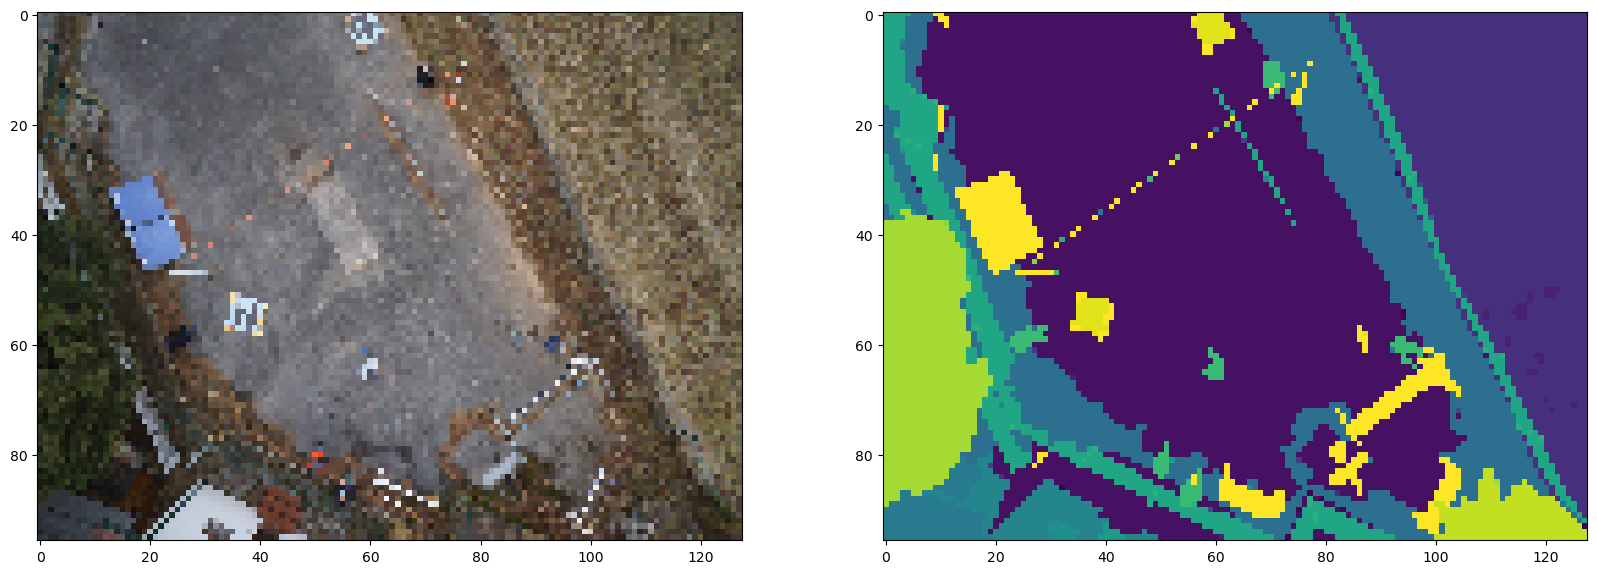

In [35]:
print(X.shape)
print(Y.shape)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(X[1])
axs[1].imshow(Y[1])

(400, 96, 128, 3)
(400, 96, 128)


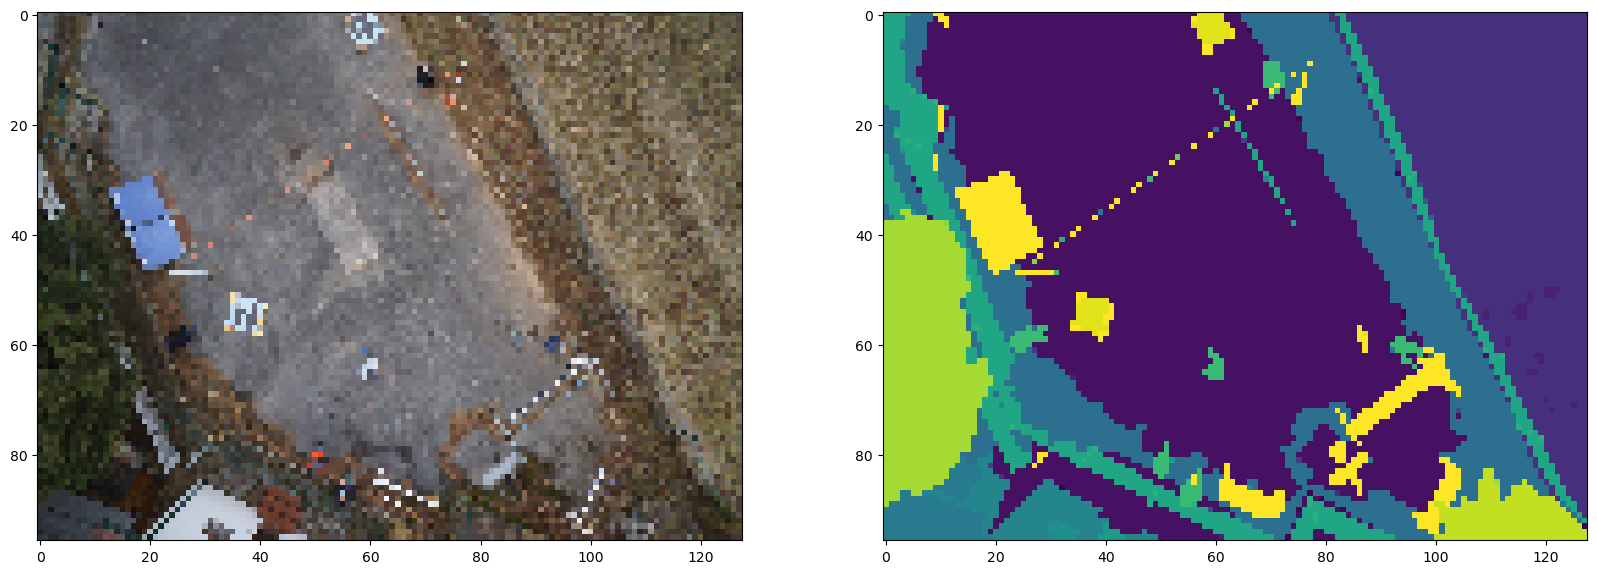

In [36]:
print(X.shape)
print(Y.shape)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(X[1])
axs[1].imshow(Y[1])

In [37]:
test_image1 = X[-1]
test_label1 = Yc[-1]
test_image2 = X[-2]
test_label2 = Yc[-2]
x_train, x_val, y_train, y_val = train_test_split(X[0:-2], Yc[0:-2], test_size = 0.1)

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(test_label1.shape)
print(test_label2.shape)

(358, 96, 128, 3)
(358, 96, 128)
(40, 96, 128, 3)
(40, 96, 128)
(96, 128)
(96, 128)


In [39]:
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    
    conv = Conv2D(n_filters, 
                  kernel_size = 3,     
                  activation='relu',
                  padding='same',
                  kernel_initializer=tf.keras.initializers.HeNormal())(inputs)
    conv = Conv2D(n_filters, 
                  kernel_size = 3, 
                  activation='relu',
                  padding='same',
                  kernel_initializer=tf.keras.initializers.HeNormal())(conv)
   
    

    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)
        
    if max_pooling:
        next_layer = MaxPooling2D(pool_size=(2,2))(conv)
        
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    
    up = Conv2DTranspose(
                 n_filters,  
                 kernel_size = 3,
                 strides=(2,2),
                 padding='same')(expansive_input)
    
    merge = concatenate([up, contractive_input], axis=3)
    conv = Conv2D(n_filters,  
                 kernel_size = 3,   
                 activation='relu',
                 padding='same',
                 kernel_initializer=tf.keras.initializers.HeNormal())(merge)
    conv = Conv2D(n_filters,  
                 kernel_size = 3,  
                 activation='relu',
                 padding='same',
                 kernel_initializer=tf.keras.initializers.HeNormal())(conv)
    
    
    return conv

In [ ]:
def unet_model(input_size=(96, 128, 3), n_filters=32, n_classes=23):
    
    inputs = Input(input_size)
    
    #contracting path
    cblock1 = conv_block(inputs, n_filters)
    cblock2 = conv_block(cblock1[0], 2*n_filters)
    cblock3 = conv_block(cblock2[0], 4*n_filters)
    cblock4 = conv_block(cblock3[0], 8*n_filters, dropout_prob=0.3) 
    cblock5 = conv_block(cblock4[0],16*n_filters, dropout_prob=0.3, max_pooling=None)     
    
    #expanding path
    ublock6 = upsampling_block(cblock5[0], cblock4[1],  8 * n_filters)
    ublock7 = upsampling_block(ublock6, cblock3[1],  n_filters*4)
    ublock8 = upsampling_block(ublock7,cblock2[1] , n_filters*2)
    ublock9 = upsampling_block(ublock8,cblock1[1],  n_filters)
    
    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)
    
    conv10 = Conv2D(n_classes, kernel_size=1, padding='same')(conv9)  
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model


img_height = 96
img_width = 128
num_channels = 3

unet = unet_model((img_height, img_width, num_channels))

In [ ]:
model_checkpoint = ModelCheckpoint('unet_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
model_earlyStopping = EarlyStopping(min_delta= 0.001, patience=50)

In [ ]:
def display(display_list):
    plt.figure(figsize=(20, 20))

    try:
    
        title = ['Input Image', 'True Mask', 'Predicted Mask',]

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i])
            plt.axis('off')
        plt.show()
        
    except:
    
        title = ['Input Image 1', 'True Mask 1', 'Predicted Mask 1', 'Input Image 2', 'True Mask 2', 'Predicted Mask 2']

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i])
            plt.axis('off')
        plt.show()

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.where(pred_mask > 0.5,1,0)
#     pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask

In [ ]:
import random
train_testing_id = random.randint(0, len(x_train))

In [ ]:
def show_predictions(x_train = x_train, y_train = y_train, num=1):
    #try:
    pred_mask = unet.predict(np.expand_dims(x_train[train_testing_id], 0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    display([x_train[train_testing_id], y_train[train_testing_id], pred_mask])

In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
    
    def on_epoch_end(self, epoch, logs=None):
#         clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [ ]:
display_cb = DisplayCallback()

In [ ]:
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = unet.fit(x=x_train, y=y_train,
              validation_data=(x_val, y_val),
              batch_size=16, epochs=200,
              callbacks=[model_checkpoint, model_earlyStopping, display_cb])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
m1 = test_image1
pred = unet.predict(np.expand_dims(m1, 0))
pred_mask = np.argmax(pred, axis=-1)
pred_mask = pred_mask[0]
pred_mask_test = pred_mask
print(pred_mask.shape)

In [ ]:
m2 = test_image2
pred2 = unet.predict(np.expand_dims(m2, 0))

pred_mask2 = np.argmax(pred2, axis=-1)
pred_mask2 = pred_mask2[0]
print(pred_mask2)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(m1)
axs[0].set_title('Image')
axs[1].imshow(test_label1)
axs[1].set_title('Ground Truth')
axs[2].imshow(pred_mask)
axs[2].set_title('Prediction')

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(m2)
axs[0].set_title('Image')
axs[1].imshow(test_label2)
axs[1].set_title('Ground Truth')
axs[2].imshow(pred_mask2)
axs[2].set_title('Prediction')

In [ ]:
new_model = tf.keras.models.load_model('unet_model.hdf5')

# Show the model architecture
new_model.summary()

In [ ]:
loss, acc = new_model.evaluate(x_val, y_val, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [ ]:
new_pred = new_model.predict(np.expand_dims(m1, 0))
new_pred = np.argmax(new_pred, axis=-1)
new_pred = new_pred[0]

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(m1)
axs[0].set_title('Image')
axs[1].imshow(test_label1)
axs[1].set_title('Ground Truth')
axs[2].imshow(new_pred)
axs[2].set_title('Prediction')

In [ ]:
print(type(new_pred))

In [ ]:
print(pred_mask.max())

In [ ]:
from matplotlib import cm

pred_mask = np.asarray(pred_mask, dtype='int32')
pred_mask = pred_mask / 255

pred_mask = cm.viridis(pred_mask)*255

In [ ]:
pred_mask = np.asarray(pred_mask, dtype='uint8')

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10))
axs[0].imshow(m1)
axs[0].set_title('Image')
axs[1].imshow(test_label1)
axs[1].set_title('Ground Truth')
axs[2].imshow(pred_mask)
axs[2].set_title('Prediction')
axs[3].imshow(new_pred)
axs[3].set_title('Prediction')

In [ ]:
pred_mask_test = np.asarray(pred_mask_test)
pred_mask_test = (pred_mask_test - np.min(pred_mask_test)) / (np.max(pred_mask_test) - np.min(pred_mask_test))
pred_mask_test = cm.viridis(pred_mask_test)*255
pred_mask_test = np.asarray(pred_mask_test, dtype='uint8')

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10))
axs[0].imshow(m1)
axs[0].set_title('Image')
axs[1].imshow(test_label1)
axs[1].set_title('Ground Truth')
axs[2].imshow(new_pred)
axs[2].set_title('Prediction')
axs[3].imshow(pred_mask_test)
axs[3].set_title('Prediction')